<a href="https://colab.research.google.com/github/PriyathamVarma/PriyathamVarma/blob/main/task2_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook is for AI coursework chatbot task 2 models implemntation

In [1137]:
# Mounting google drive for accessing files
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [1138]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import seaborn
#import seaborn as sns
# imports
#import plotly.express as px 
# Tensorflow
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import datetime
import seaborn as sns
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

In [1139]:
# Creating a wb variable to store the spreadsheet bu URL


wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1Uc0IftU39xiQNV5gV0ASTTcElOrpgKRseG3HeIfeF2g/edit#gid=387344816')
# Getting the sheet(if multiple sheets exists) by sheet name
sheet = wb.worksheet('train.csv')
# Getting all values that exist in the sheet
data = sheet.get_all_values()
# Converting the values into a dataframe
data_frame = pd.DataFrame(data)

In [1140]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303825 entries, 0 to 303824
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       303825 non-null  object
 1   1       303825 non-null  object
 2   2       303825 non-null  object
 3   3       303825 non-null  object
 4   4       303825 non-null  object
 5   5       303825 non-null  object
 6   6       303825 non-null  object
 7   7       303825 non-null  object
 8   8       303825 non-null  object
 9   9       303825 non-null  object
dtypes: object(10)
memory usage: 23.2+ MB


In [1141]:
pip install pandasql

In [1142]:
import tensorflow as tf
import pandasql as ps

In [1143]:
# Getting the first row to be the header

data_frame.columns = data_frame.iloc[0]

data_frame = data_frame.iloc[1:].reset_index(drop=True)

In [1144]:
new_df = pd.DataFrame()

In [1145]:
new_df = data_frame.drop(['day','month'], axis=1)

In [1146]:
new_df.head(5)

,year,rail_id,station,planned_arr,planned_dep,actual_arr,month_fmt,day_fmt
0,2017,8734960,DRCHS,09:12,09:12,09:11,02,01
1,2017,8734960,WARHAM,09:27,09:29,09:27,02,01
2,2017,8734960,HMWTHY,09:34,09:35,09:33,02,01
3,2017,8734960,POOLE,09:39,09:39,09:38,02,01
4,2017,8734960,PSTONE,09:44,09:43,09:41,02,01


In [1147]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303824 entries, 0 to 303823
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   year         303824 non-null  object
 1   rail_id      303824 non-null  object
 2   station      303824 non-null  object
 3   planned_arr  303824 non-null  object
 4   planned_dep  303824 non-null  object
 5   actual_arr   303824 non-null  object
 6   month_fmt    303824 non-null  object
 7   day_fmt      303824 non-null  object
dtypes: object(8)
memory usage: 18.5+ MB


In [1148]:
new_df['required_time'] = new_df['year'] + new_df['month_fmt'] + new_df['day_fmt'] + new_df['planned_arr']

In [1149]:
new_df.head(5)

,year,rail_id,station,planned_arr,planned_dep,actual_arr,month_fmt,day_fmt,required_time
0,2017,8734960,DRCHS,09:12,09:12,09:11,02,01,2017020109:12
1,2017,8734960,WARHAM,09:27,09:29,09:27,02,01,2017020109:27
2,2017,8734960,HMWTHY,09:34,09:35,09:33,02,01,2017020109:34
3,2017,8734960,POOLE,09:39,09:39,09:38,02,01,2017020109:39
4,2017,8734960,PSTONE,09:44,09:43,09:41,02,01,2017020109:44


In [1150]:
from datetime import datetime

In [1151]:
import time
import datetime

"""date = datetime.datetime.strptime(x[0], "%H:%M")"""

actual_arr_list = []
for x in new_df['planned_arr'].values:
  if len(x) == 5:
    k = datetime.datetime.strptime(x, "%H:%M")
    t = (k.hour * 60 * 60) + (k.minute * 60)
  else:
    t = 0

  actual_arr_list.append(t)  

In [1152]:
new_df['timeStamp'] = actual_arr_list

In [1153]:
x = new_df['planned_arr'].values

In [1154]:
import time
import datetime
date = datetime.datetime.strptime(x[0], "%H:%M")

In [1155]:

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = data_frame['station'].values
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[1, :])])
print(inverted)

['DRCHS' 'WARHAM' 'HMWTHY' ... 'WDON' 'CLPHMJM' 'WATRLMN']
[12 61 28 ... 64  9 62]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['WARHAM']


In [1156]:
final_main_df.head(5)

,timestamps,station,rail_ids,station_name,pta,ptd,planned_differnce
0,33120,12,8734960,DRCHS,09:12,09:12,0
1,34020,61,8734960,WARHAM,09:27,09:29,-120
2,34440,28,8734960,HMWTHY,09:34,09:35,-60
3,34740,40,8734960,POOLE,09:39,09:39,0
4,35040,41,8734960,PSTONE,09:44,09:43,60


In [1157]:
# list of integer encode values

list_of_int_encoded = []

for t in range(0,len(integer_encoded)):
  list_of_int_encoded.append(integer_encoded[t][0])

In [1158]:
final_main_df = pd.DataFrame()

In [1159]:
final_main_df['timestamps'] = actual_arr_list
final_main_df['station'] = list_of_int_encoded
final_main_df['rail_ids'] = data_frame['rail_id']
final_main_df['station_name'] = values

#  models

In [1160]:
x = integer_encoded

In [1161]:
final_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303824 entries, 0 to 303823
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   timestamps    303824 non-null  int64 
 1   station       303824 non-null  int64 
 2   rail_ids      303824 non-null  object
 3   station_name  303824 non-null  object
dtypes: int64(2), object(2)
memory usage: 9.3+ MB


# Class starts from here

In [1162]:
index_for_x = []
for i in range(0,len(final_main_df['rail_ids'])):
  if final_main_df['rail_ids'][i] == '8734960':
    index_for_x.append(i)

In [1163]:
final_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303824 entries, 0 to 303823
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   timestamps    303824 non-null  int64 
 1   station       303824 non-null  int64 
 2   rail_ids      303824 non-null  object
 3   station_name  303824 non-null  object
dtypes: int64(2), object(2)
memory usage: 9.3+ MB


In [1164]:
y_list = []
x_list = []
for u in range(0,len(final_main_df['timestamps'])):
  if u in index_for_x:
    y_list.append(final_main_df['timestamps'][u])
    x_list.append(final_main_df['station'][u])



In [1165]:
x_list

[12,
 61,
 28,
 40,
 41,
 4,
 3,
 1,
 48,
 49,
 69,
 70,
 62,
 12,
 61,
 28,
 40,
 41,
 4,
 3,
 1,
 48,
 49,
 69,
 70,
 62,
 12,
 61,
 28,
 40,
 41,
 4,
 3,
 1,
 48,
 49,
 69,
 70,
 62,
 12,
 61,
 28,
 40,
 41,
 4,
 3,
 1,
 48,
 49,
 69,
 70,
 62,
 12,
 61,
 28,
 40,
 41,
 4,
 3,
 1,
 48,
 49,
 69,
 70,
 62,
 12,
 61,
 28,
 40,
 41,
 4,
 3,
 1,
 48,
 49,
 69,
 70,
 62,
 12,
 61,
 28,
 40,
 41,
 4,
 3,
 1,
 48,
 49,
 69,
 70,
 62,
 12,
 61,
 28,
 40,
 41,
 4,
 3,
 1,
 48,
 49,
 69,
 70,
 62,
 12,
 61,
 28,
 40,
 41,
 4,
 3,
 1,
 48,
 49,
 69,
 70,
 62,
 12,
 61,
 28,
 40,
 41,
 4,
 3,
 1,
 48,
 49,
 69,
 70,
 62,
 12,
 61,
 28,
 40,
 41,
 4,
 3,
 1,
 48,
 49,
 69,
 70,
 62,
 12,
 61,
 28,
 40,
 41,
 4,
 3,
 1,
 48,
 49,
 69,
 70,
 62,
 12,
 61,
 28,
 40,
 41,
 4,
 3,
 1,
 48,
 49,
 69,
 70,
 62,
 12,
 61,
 28,
 40,
 41,
 4,
 3,
 1,
 48,
 49,
 69,
 70,
 62,
 12,
 61,
 28,
 40,
 41,
 4,
 3,
 1,
 48,
 49,
 69,
 70,
 62,
 12,
 61,
 28,
 40,
 41,
 4,
 3,
 1,
 48,
 49,
 69,
 70,
 62,
 12,
 61

# Test

In [1166]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score

In [1167]:
# Splitting into training and testing
#splitting into train and test
from sklearn.model_selection import train_test_split

# Without stratification divide into first partition and test set.
train_X,test_X, train_y, test_y= train_test_split (x_list,y_list, test_size=0.4,random_state=10)


In [1168]:
train_X = np.array(train_X).reshape(-1,1)
train_y = np.array(train_y).reshape(-1,1)
test_X = np.array(test_X).reshape(-1,1)
test_y = np.array(test_y).reshape(-1,1)

In [1169]:
#classifier 1
#LinearSVC

from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(train_X, train_y);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [1170]:
precision_recall_fscore_support(test_y, svc.predict(test_X), average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.07815206142075697, 0.0967741935483871, 0.08468019729296604, None)

In [1171]:
#classifier 2
#NaiveBayes

from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(train_X, train_y);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1172]:
precision_recall_fscore_support(test_y, naive_bayes.predict(test_X), average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.5438434314714722, 0.5666666666666667, 0.5536577648064896, None)

In [1173]:
#classifier 3
#stochastic gradient descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(train_X, train_y);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1174]:
precision_recall_fscore_support(test_y, sgd.predict(test_X), average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.046217570227232066, 0.1, 0.05483300901378601, None)

In [1175]:
#classifier 4
#knn classifier
from sklearn.neighbors import KNeighborsClassifier

clf_nn = KNeighborsClassifier(n_neighbors=5)
clf_knn=clf_nn
clf_knn.fit(train_X,train_y)
y_hat = clf_knn.predict(test_X)
y_hat


from sklearn.metrics import accuracy_score

#we can use the built in accuracy metrics in sklearn.
accuracy = accuracy_score(test_y, y_hat)
print('calculated accuracy:',accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


calculated accuracy: 0.9710806697108066


In [1176]:
precision_recall_fscore_support(test_y, y_hat, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.510166455526455, 0.5333333333333333, 0.520151719901481, None)

In [1177]:
#classifier 5
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier

random_variable = RandomForestClassifier(max_depth=100)

random_variable.fit(train_X,train_y)

new_random_variable = random_variable.predict(test_X)

new_random_variable


from sklearn.metrics import accuracy_score

#we can use the built in accuracy metrics in sklearn.
accuracy2 = accuracy_score(test_y, new_random_variable)
print('Sklearn calculated accuracy:',accuracy2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Sklearn calculated accuracy: 0.971841704718417


In [1178]:
precision_recall_fscore_support(test_y, new_random_variable, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.5438434314714722, 0.5666666666666667, 0.5536577648064896, None)

In [1179]:
#classifier 6
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=100)

decision_tree.fit(train_X,train_y)

new_decision_tree = decision_tree.predict(test_X)

decision_tree


from sklearn.metrics import accuracy_score

#we can use the built in accuracy metrics in sklearn.
accuracy3 = accuracy_score(test_y, new_decision_tree)
print('Sklearn calculated accuracy:',accuracy3)

Sklearn calculated accuracy: 0.971841704718417


In [1180]:
precision_recall_fscore_support(test_y, new_decision_tree, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.5438434314714722, 0.5666666666666667, 0.5536577648064896, None)

In [1181]:
#scores
#comparison of classifiers

from sklearn.metrics import accuracy_score

classifiers = [svc, sgd,  naive_bayes ,clf_nn,decision_tree, random_variable]

# for each classifier get the accuracy score
scores = [accuracy_score(clf.predict(test_X), test_y) for clf in classifiers]
    
index = np.argmax(scores)

print(scores,2)

print(classifiers[index])
print("highest score",round(scores[index],2))
accuracy_percentage = (round(scores[index],2))*100
print("ACCURACY PERCENTAGE FOR CLASSIFIER ",accuracy_percentage,"%") 

[0.21385083713850836, 0.23059360730593606, 0.971841704718417, 0.9710806697108066, 0.971841704718417, 0.971841704718417] 2
GaussianNB()
highest score 0.97
ACCURACY PERCENTAGE FOR CLASSIFIER  97.0 %


# Test for linear regression


In [1182]:
new_df.head(5)

,year,rail_id,station,planned_arr,planned_dep,actual_arr,month_fmt,day_fmt,required_time,timeStamp
0,2017,8734960,DRCHS,09:12,09:12,09:11,02,01,2017020109:12,33120
1,2017,8734960,WARHAM,09:27,09:29,09:27,02,01,2017020109:27,34020
2,2017,8734960,HMWTHY,09:34,09:35,09:33,02,01,2017020109:34,34440
3,2017,8734960,POOLE,09:39,09:39,09:38,02,01,2017020109:39,34740
4,2017,8734960,PSTONE,09:44,09:43,09:41,02,01,2017020109:44,35040


In [1183]:
y_array = np.array(y_list)

In [1184]:
x_list = np.array(x_list).reshape(-1,1)

In [1185]:
model = LinearRegression()
model.fit(x_list, y_array)
r_sq = model.score(x_list, y_array)
print(r_sq*100)

29.906440854576843


In [1186]:
# predict
y_pred = model.predict(np.array(x_list).reshape(-1,1))

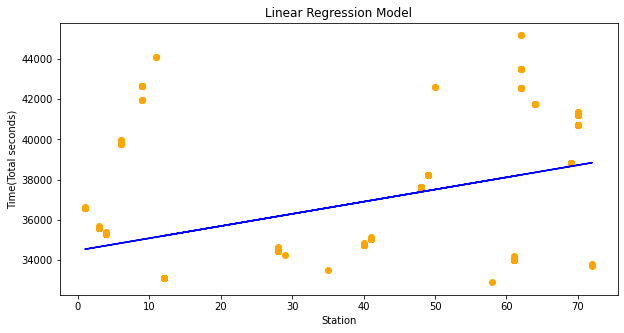

In [1187]:
plt.figure(figsize=(10,5))
plt.scatter(x_list,y_array,color="orange")
plt.plot(x_list,y_pred,"blue")
plt.title('Linear Regression Model')
plt.xlabel('Station')
plt.ylabel('Time(Total seconds)')
plt.show()

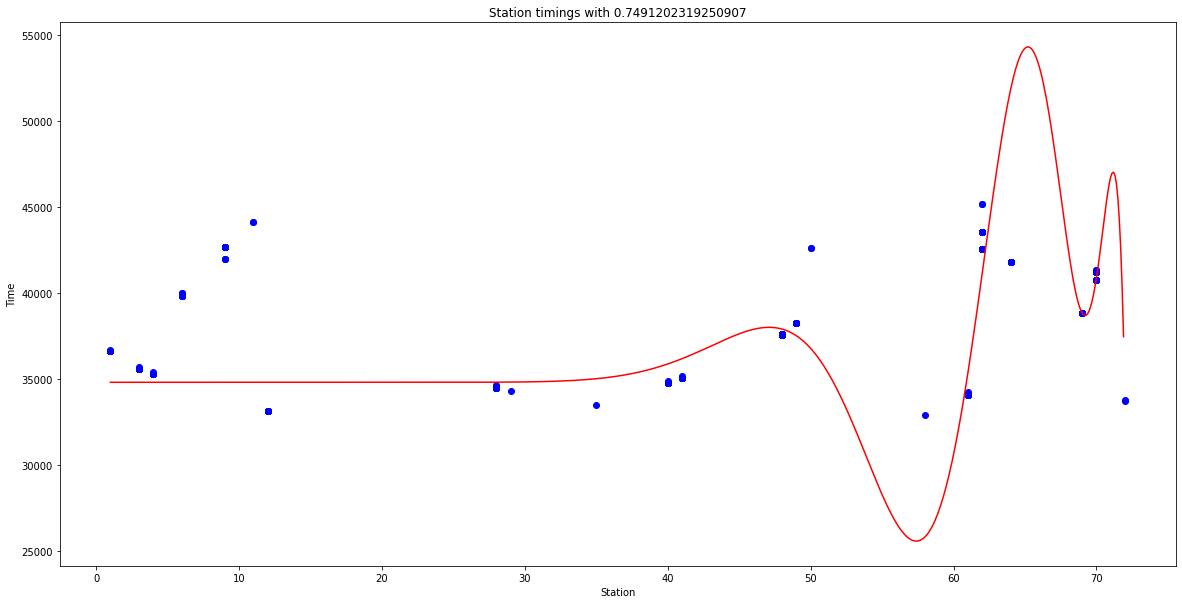

In [1188]:
# polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=25)
X_poly = poly_reg.fit_transform(x_list)
 
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y_array)
 
  
X_grid = np.arange(min(x_list),max(x_list),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 

r2_value = r2_score(y_array, lin_reg2.predict(poly_reg.fit_transform(x_list)))#r2 values
plt.figure(figsize=(20,10))  
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='red') 
plt.scatter(x_list,y_array, color='blue')  
plt.title(f"Station timings with {r2_value}")
plt.xlabel('Station')
plt.ylabel('Time')
plt.show()

In [1189]:
"""from sklearn.preprocessing import PolynomialFeatures
r2_list = []
features_list = []
for i in range(0,70):

    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(x_list)
    
    lin_reg2 = LinearRegression()
    lin_reg2.fit(X_poly,y_array)
    
      
    X_grid = np.arange(min(x_list),max(x_list),0.1)
    X_grid = X_grid.reshape(len(X_grid),1) 

    r2_value = r2_score(y_array, lin_reg2.predict(poly_reg.fit_transform(x_list)))#r2 values

    r2_list.append(r2_value*100)
    features_list.append(i)

    plt.figure(figsize=(20,10))  
    plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='red') 
    plt.scatter(x_list,y_array, color='blue')  
    plt.title(f"Station timings with {r2_value}")
    plt.xlabel('Station')
    plt.ylabel('Time')
    plt.show()"""

'from sklearn.preprocessing import PolynomialFeatures\nr2_list = []\nfeatures_list = []\nfor i in range(0,70):\n\n    poly_reg = PolynomialFeatures(degree=i)\n    X_poly = poly_reg.fit_transform(x_list)\n    \n    lin_reg2 = LinearRegression()\n    lin_reg2.fit(X_poly,y_array)\n    \n      \n    X_grid = np.arange(min(x_list),max(x_list),0.1)\n    X_grid = X_grid.reshape(len(X_grid),1) \n\n    r2_value = r2_score(y_array, lin_reg2.predict(poly_reg.fit_transform(x_list)))#r2 values\n\n    r2_list.append(r2_value*100)\n    features_list.append(i)\n\n    plt.figure(figsize=(20,10))  \n    plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color=\'red\') \n    plt.scatter(x_list,y_array, color=\'blue\')  \n    plt.title(f"Station timings with {r2_value}")\n    plt.xlabel(\'Station\')\n    plt.ylabel(\'Time\')\n    plt.show()'

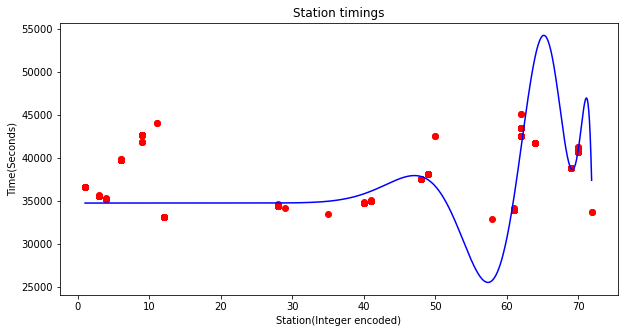

In [1190]:
# polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=25)
X_poly = poly_reg.fit_transform(x_list)
 
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y_array)
 
  
X_grid = np.arange(min(x_list),max(x_list),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 

r2_value = r2_score(y_array, lin_reg2.predict(poly_reg.fit_transform(x_list)))#r2 values
plt.figure(figsize=(10,5))  
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='blue') 
plt.scatter(x_list,y_array, color='red')  
plt.title(f"Station timings")
plt.xlabel('Station(Integer encoded)')
plt.ylabel('Time(Seconds)')
plt.show()

In [1191]:
# data frame for features and its r2 values
features_df = pd.DataFrame()
features_df['features'] = features_list
features_df['r2_value'] = r2_list

In [1192]:
"""features_df.style.background_gradient(cmap="Blues")"""

'features_df.style.background_gradient(cmap="Blues")'

In [1193]:
"""plt.figure(figsize=(10,5))

plt.plot(features_df)
plt.xlabel('Features')
plt.ylabel('R2 value(%)')
plt.title('Features vs r2 value(%) for Ploynomial regression')
plt.show()"""

"plt.figure(figsize=(10,5))\n\nplt.plot(features_df)\nplt.xlabel('Features')\nplt.ylabel('R2 value(%)')\nplt.title('Features vs r2 value(%) for Ploynomial regression')\nplt.show()"

In [1194]:
y_poly_pred = lin_reg2.predict(poly_reg.fit_transform(np.array(x_list).reshape(-1,1)))

# Number to hours and minutes


In [1195]:
def convertor(num):
  b = num/3600
  a = int(num/3600)
  c = b - a 
  d = int(c * 60)
  """print(f'{a}:{d}')"""
  return (f'{a}:{d}')



In [1196]:
convertor(y_array[0])


'9:11'

In [1197]:
convertor(y_poly_pred[0])

'9:39'

# Test for stations


In [1198]:
final_main_df['pta'] = data_frame['planned_arr']
final_main_df['ptd'] = data_frame['planned_dep']

In [1199]:
final_main_df['pta'].values[0]

'09:12'

In [1200]:
planned_arr_list = []
planned_dep_list = []
for x,y in zip(final_main_df['pta'].values,final_main_df['ptd'].values):
  if len(x) == 5:
    k = datetime.datetime.strptime(x, "%H:%M")    
    t = (k.hour * 60 * 60) + (k.minute * 60)
    
  if len(y) == 5:
    k1 = datetime.datetime.strptime(y, "%H:%M")
    t1 = (k1.hour * 60 * 60) + (k1.minute * 60)

  else:
    t = 0
    t1 = 0

  planned_arr_list.append(t)
  planned_dep_list.append(t1)

In [1201]:
planned_dep_list[1:10]

[34140, 34500, 34740, 34980, 35220, 35640, 36600, 37800, 38220]

In [1202]:
planned_arr_list[1:10]

[34020, 34440, 34740, 35040, 35280, 35580, 36600, 37560, 38220]

In [1203]:
planned_time_diff = [int(x-y) for x,y in zip(planned_arr_list,planned_dep_list)]

In [1204]:
final_main_df['planned_differnce'] = planned_time_diff

In [1205]:
final_main_df.head(20)

,timestamps,station,rail_ids,station_name,pta,ptd,planned_differnce
0,33120,12,8734960,DRCHS,09:12,09:12,0
1,34020,61,8734960,WARHAM,09:27,09:29,-120
2,34440,28,8734960,HMWTHY,09:34,09:35,-60
3,34740,40,8734960,POOLE,09:39,09:39,0
4,35040,41,8734960,PSTONE,09:44,09:43,60
5,35280,4,8734960,BRANKSM,09:48,09:47,60
6,35580,3,8734960,BOMO,09:53,09:54,-60
7,36600,1,8734960,BKNHRST,10:10,10:10,0
8,37560,48,8734960,SOTON,10:26,10:30,-240
9,38220,49,8734960,SOTPKWY,10:37,10:37,0


In [ ]:
enter_time = input("Enter the delayed time in %H:%M:")

k = datetime.datetime.strptime(enter_time, "%H:%M")
time = (k.hour * 60 * 60) + (k.minute * 60)

print(time)

# Function for calculating all required values

In [1206]:
# get the sttaion realted row indices
list_for_stations = []
for i in range(0,len(final_main_df['station_name'])):
  if final_main_df['station_name'][i] == 'POOLE':
    list_for_stations.append(i)

In [1207]:
# set the station name as index
indexed_df = final_main_df.set_index('station_name')

In [1208]:
# get the unique train ids by station name
unique_train = np.unique(indexed_df.loc['POOLE'].rail_ids.values)

In [1209]:
# get the number of unique trains
unique_trains = unique_train

In [1210]:
numb = int(int(len(unique_train)/100)/2)

In [1211]:
top_trains = unique_train[0:numb]

In [1212]:
top_trains

array(['7900005', '7900006', '7900033'], dtype=object)

*************** Data frame for 7900005 ***************************
0.46878218493124324


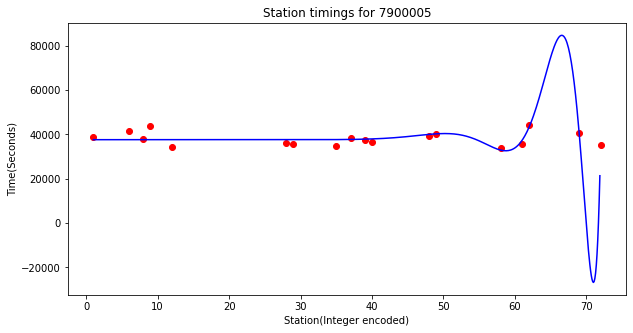

******* Estimations **********
11
             timestamps station rail_ids  ... act_arrival act_arr act_dep
station_name                              ...                            
POOLE             36360      40  7900005  ...       33600    9:20    9:20
POKSDWN           37560      39  7900005  ...       34800    9:39    9:39
CHRISTC           37740       8  7900005  ...       34980    9:43    9:43
NMILTON           38160      37  7900005  ...       35400    9:50    9:50
BKNHRST           38640       1  7900005  ...       35880    9:58    9:58
SOTON             39480      48  7900005  ...       36720   10:11   10:11
SOTPKWY           40020      49  7900005  ...       37260   10:20   10:20
WNCHSTR           40620      69  7900005  ...       37860   10:31   10:31
BSNGSTK           41640       6  7900005  ...       38880   10:48   11:15
CLPHMJM           43920       9  7900005  ...       41160   11:26   11:26
WATRLMN           44400      62  7900005  ...       41640   11:33   11:33

[11

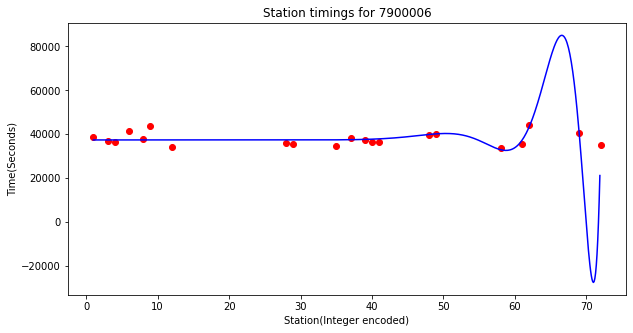

******* Estimations **********
14
             timestamps station rail_ids  ... act_arrival act_arr act_dep
station_name                              ...                            
POOLE             36360      40  7900006  ...       33600    9:20    9:31
PSTONE            36480      41  7900006  ...       33720    9:22    9:35
BRANKSM           36660       4  7900006  ...       33900    9:24    9:39
BOMO              37020       3  7900006  ...       34260    9:31    9:46
POKSDWN           37560      39  7900006  ...       34800    9:39    9:50
CHRISTC           37740       8  7900006  ...       34980    9:43    9:54
NMILTON           38160      37  7900006  ...       35400    9:50    10:3
BKNHRST           38640       1  7900006  ...       35880    9:58    10:9
SOTON             39480      48  7900006  ...       36720   10:11   10:24
SOTPKWY           40020      49  7900006  ...       37260   10:20   10:31
WNCHSTR           40620      69  7900006  ...       37860   10:31   10:41
BSNG

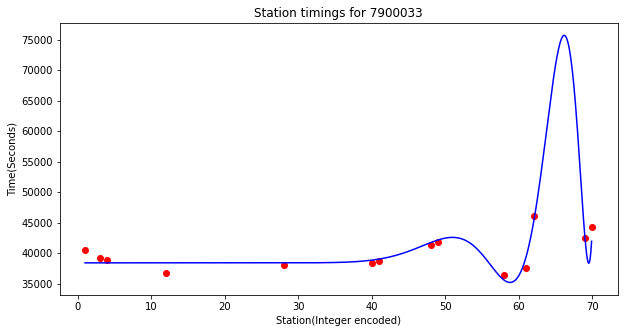

******* Estimations **********
10
             timestamps station rail_ids  ... act_arrival act_arr act_dep
station_name                              ...                            
POOLE             38340      40  7900033  ...       33600    9:20    9:20
PSTONE            38640      41  7900033  ...       33900    9:24    9:24
BRANKSM           38880       4  7900033  ...       34140    9:28    9:28
BOMO              39240       3  7900033  ...       34500    9:35    9:35
BKNHRST           40440       1  7900033  ...       35700    9:54    9:54
SOTON             41280      48  7900033  ...       36540    10:9   10:18
SOTPKWY           41820      49  7900033  ...       37080   10:18   10:18
WNCHSTR           42420      69  7900033  ...       37680   10:28   10:20
WOKING            44340      70  7900033  ...       39600    11:0    11:5
WATRLMN           46140      62  7900033  ...       41400   11:30   11:30

[10 rows x 13 columns]


In [1298]:
# for loop for getting data frames
for rail_id in top_trains:
  # for loop - rail ids
  list_of_columns = final_main_df.columns
  latest_df = pd.DataFrame(columns = list_of_columns)
  for i in range(0,len(final_main_df['rail_ids'])):
    if final_main_df['rail_ids'][i] == rail_id:     
      series = pd.Series(final_main_df.iloc[i].values, index=latest_df.columns)
      latest_df = latest_df.append(series,ignore_index=True)
  print(f'*************** Data frame for {rail_id} ***************************')  
  # getting stations after the required stations
  for j in range(len(latest_df['station_name'])):
    if 'POOLE' in latest_df['station_name'][j]:
      global t
      t = j

  """print(latest_df.iloc[t:])""" 
  y_list = latest_df['timestamps']
  x_list = latest_df['station']

  # polynomial regression model
  from sklearn.preprocessing import PolynomialFeatures
  poly_reg = PolynomialFeatures(degree=25)
  y_array = np.array(y_list)
  x_list = np.array(x_list).reshape(-1,1)
  X_poly = poly_reg.fit_transform(x_list)
  
  lin_reg2 = LinearRegression()
  lin_reg2.fit(X_poly,y_array)
  
    
  X_grid = np.arange(min(x_list),max(x_list),0.1)
  X_grid = X_grid.reshape(len(X_grid),1) 

  r2_value = r2_score(y_array, lin_reg2.predict(poly_reg.fit_transform(x_list)))#r2 values
  y_poly_predictions = lin_reg2.predict(poly_reg.fit_transform(x_list))
  print(r2_value)
  plt.figure(figsize=(10,5))  
  plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='blue') 
  plt.scatter(x_list,y_array, color='red')  
  plt.title(f"Station timings for {rail_id}")
  plt.xlabel('Station(Integer encoded)')
  plt.ylabel('Time(Seconds)')
  plt.show()

  print('******* Estimations **********')
  latest_df['estimated_arrival_timestamps'] = y_poly_predictions
  estimated_dep_list = latest_df['estimated_arrival_timestamps'] - latest_df['planned_differnce']
  latest_df['estimated_dep_timestamps'] = estimated_dep_list

  #for loops for getting estimates
  final_est_arrival = [convertor(int(c)) for c in latest_df['estimated_arrival_timestamps'].values]
  final_est_departure = [convertor(int(c)) for c in latest_df['estimated_dep_timestamps'].values]

  latest_df['estimated_arrival'] = final_est_arrival
  latest_df['estimated_departure'] = final_est_departure


  """print(latest_df)"""

  # final dataframes
  indexed_latest_df = latest_df[t:].set_index('station_name')
  """print(indexed_latest_df)"""
  print(len(y_poly_predictions[t:]))

  req_poly_preds = y_array[t:]
  associated_stations_time_diff = []
  for k in range(len(req_poly_preds)):
    if k < len(req_poly_preds)-1:
      associated_stations_time_diff.append(req_poly_preds[k]-req_poly_preds[k+1])

  #inserting 0 at first
  associated_stations_time_diff.insert(0,0)    

  # for loop for getting the differnce times
  new_list = []
  for q in range(0,len(associated_stations_time_diff)):
    a = sum(associated_stations_time_diff[:q+1])
    new_list.append(a)

  # for loop for getting exact times
  final_list = [time-o for o in new_list]  
  """print(final_list)"""

  indexed_latest_df['act_arrival'] = final_list
  final_dep_list = indexed_latest_df['act_arrival'] - indexed_latest_df['planned_differnce']
  actual_dep_list = list(final_dep_list.values)

  # for getting actual times
  indexed_latest_df['act_arr'] = [convertor(g) for g in final_list]
  indexed_latest_df['act_dep'] = [convertor(g) for g in actual_dep_list]

  #unwanted columns
  indexed_latest_df.drop(columns=unwanted_columns)


  #getting into dataframe
  print(indexed_latest_df)
